In [155]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('Mall_Customers.csv')

In [157]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [158]:
df.shape

(200, 5)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [160]:
df_encoded = pd.get_dummies(df, columns=['Gender'])

In [161]:
df_encoded.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [162]:
scaler = StandardScaler()
final_df = df_encoded
numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('CustomerID', errors='ignore')
final_df[numerical_columns] = scaler.fit_transform(final_df[numerical_columns])

In [163]:
final_df.drop(columns='CustomerID',inplace=True)
final_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0


In [164]:
Q1 = final_df.quantile(0.25)
Q3 = final_df.quantile(0.75)

# Calculate IQR (Interquartile Range) for each feature
IQR = Q3 - Q1

# Define a threshold multiplier (e.g., 1.5)
threshold_multiplier = 1.5

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - (threshold_multiplier * IQR)
upper_bound = Q3 + (threshold_multiplier * IQR)

# Identify outliers
outliers = ((final_df < lower_bound) | (final_df > upper_bound)).any(axis=1)

# Remove outliers from the dataset (optional)
cleaned_df = final_df[~outliers]

print("Before outlier removal:")
print(final_df.shape)
print("After outlier removal:")
cleaned_df.shape

Before outlier removal:
(200, 5)
After outlier removal:


(198, 5)

c:\Users\nadaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nadaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nadaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

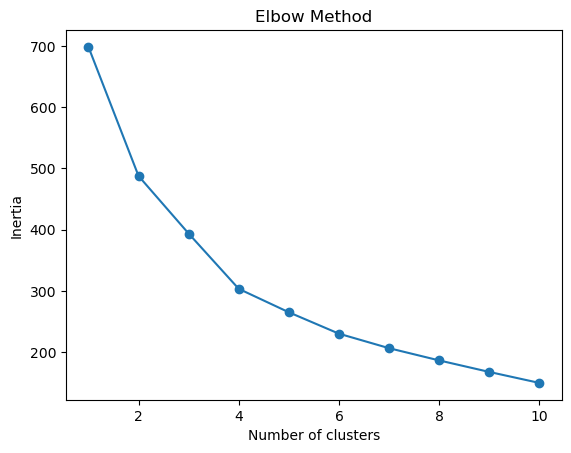

In [165]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(final_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [166]:
from sklearn.cluster import KMeans
# Assuming final_df_encoded_scaled contains the features you want to cluster
# k is the chosen number of clusters
k=4
# Initialize KMeans object with chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

# Fit KMeans clustering algorithm to the data
kmeans.fit(final_df)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
final_df['Cluster'] = cluster_labels

c:\Users\nadaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nadaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


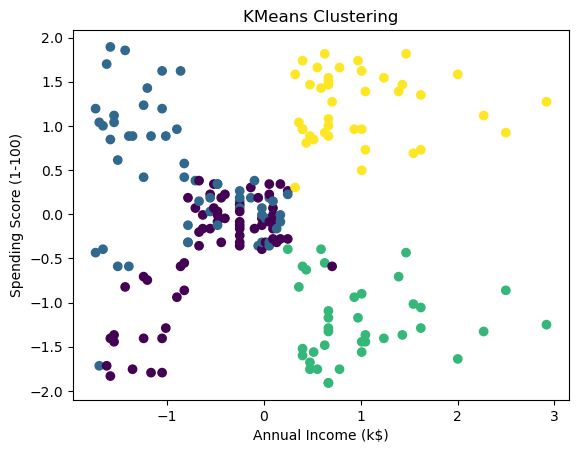

In [167]:

# Plot the clusters based on 'Annual Income' and 'Spending Score'
plt.scatter(final_df['Annual Income (k$)'], final_df['Spending Score (1-100)'], c=final_df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering')
plt.show()


In [168]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(final_df, cluster_labels)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.4296675763845931
